In [9]:
import numpy as np
import scipy.io
import time
from my_improved_gaussian_classify import *
from my_confusion import *

import matplotlib.pyplot as plt

In [2]:
# ___________________________ begin actual system ___________________________ #
# Load the data set
filename = "/afs/inf.ed.ac.uk/group/teaching/inf2b/cwk2/d/s1621503/data.mat";
# use local data set while not connected to afs
try:
    data = scipy.io.loadmat(filename)
    print("loaded data from afs!")
except Exception:
    data = scipy.io.loadmat("../data.mat")
    print("couldn't load data from afs! loading local data...")

# Feature vectors: Convert uint8 to double, and divide by 255
Xtrn = data['dataset']['train'][0, 0]['images'][0, 0].astype(dtype=np.float_) / 255.0
Xtst = data['dataset']['test'][0, 0]['images'][0, 0].astype(dtype=np.float_) / 255.0
# Labels : convert float64 to integer, and subtract 1 so that class number starts at 0 rather than 1
Ctrn = data['dataset']['train'][0, 0]['labels'][0, 0].astype(dtype=np.int_) - 1
Ctst = data['dataset']['test'][0, 0]['labels'][0, 0].astype(dtype=np.int_) - 1

couldn't load data from afs! loading local data...


In [6]:
dims = np.arange(26) + 1
results = np.zeros((26))
epsilon = epsilon_pca = 1e-10

In [23]:
for dim in dims:
    if not results[dim]:
        print("running with dims=%2d, ε=%.1e"
                        % (dim, epsilon))
        (_, Cpreds) = my_improved_gaussian_classify(Xtrn, Ctrn, Xtst, dims=dim,
                                               epsilon=epsilon, epsilon_pca=epsilon_pca)
        # Get a confusion matrix and accuracy
        CM, acc = my_confusion(Ctst, Cpreds)

        N = Xtst.shape[0]
        print("dims = %2d, ε = %.0e, N = %d, Nerrs = %4d, acc = %.2f%%" \
            % (dim, epsilon, N, N * (1 - acc), acc*100))
        
        results[dim] = (acc*100)
    else:
        pass

running with dims=22, ε=1.0e-10
covariance matrices (784x784)x26: 2841.03s
eigenvectors: 120.61s
PCA transforms: 5.05s
covariance matrices (22x22)x26: 0.20s
computing class likelihoods: # 0
                             # 1
                             # 2
                             # 3
                             # 4
                             # 5
                             # 6
                             # 7
                             # 8
                             # 9
                             # 10
                             # 11
                             # 12
                             # 13
                             # 14
                             # 15
                             # 16
                             # 17
                             # 18
                             # 19
                             # 20
                             # 21
                             # 22
                             # 23
                             # 24
   

IndexError: index 26 is out of bounds for axis 0 with size 26

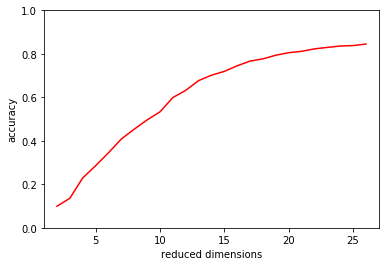

In [30]:
dims_plot = dims[results != 0]
results_plot = results[results != 0]

plt.xlim(dims[0], dims[-1] + 1)
plt.ylim(0, 1)

plt.xlabel('reduced dimensions')
plt.ylabel('accuracy')

plt.plot(dims_plot, results_plot / 100.0, color='red')

plt.show()